1. Importar las librerías necesarias:
    • Importar Matplotlib, NumPy y Pandas.
2. Cargar los datos desde un archivo CSV.:
    • Cargar el dataset "datos_trafico.csv" en un DataFrame de Pandas.
3. Crear un gráfico de líneas para visualizar el tráfico diario :
    • Usar la función plt.plot() para crear un gráfico de líneas que muestre la cantidad de vehículos por día.
4. Crear un histograma para analizar la distribución de velocidades :
    • Usar plt.hist() para visualizar la distribución de velocidades promedio de los vehículos.
    • Usar 8 bins para dividir los datos en intervalos.
5. Crear un gráfico de dispersión para analizar la relación entre vehículos y accidentes :
    • Añade un título, etiquetas para los ejes X e Y, y cambia el color de las barras.
6. Personalización de gráficos:
    • Los gráficos deben incluir:
        o Títulos claros que expliquen el contenido del gráfico.
        o Etiquetas en los ejes X e Y.
        o Leyendas cuando sea necesario.
        o Colores adecuados y estilos personalizados.
        o Tamaño ajustado para mejor visibilidad (figsize).
7. Guardar el gráfico de dispersión en un archivo PNG
    • Usar plt.savefig() para guardar el gráfico de dispersión como "grafico_accidentes.png"


In [29]:
#1. Importar las librerías necesarias:

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression

#2. Cargar los datos desde un archivo CSV:
df = pd.read_csv('C:/Users/danna/OneDrive/Documentos/GitHub/data-science/M4/S6/datos_trafico.csv')

print(f'\nInformación del dataframe: \n')
print(df.info())
print(f'{df.describe()} \n')
print(df.head(5))


Información del dataframe: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Día                 30 non-null     int64
 1   Vehículos           30 non-null     int64
 2   Accidentes          30 non-null     int64
 3   Velocidad_Promedio  30 non-null     int64
dtypes: int64(4)
memory usage: 1.1 KB
None
             Día    Vehículos  Accidentes  Velocidad_Promedio
count  30.000000    30.000000   30.000000           30.000000
mean   15.500000  4311.666667   11.666667           27.600000
std     8.803408  1665.661478    6.138254            8.965836
min     1.000000  1500.000000    2.000000           13.000000
25%     8.250000  3050.000000    7.000000           20.250000
50%    15.500000  4400.000000   11.000000           27.500000
75%    22.750000  5650.000000   16.750000           34.750000
max    30.000000  7000.000000   23.000000      

C:\Users\danna\AppData\Local\Temp\ipykernel_332\1140837726.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left')


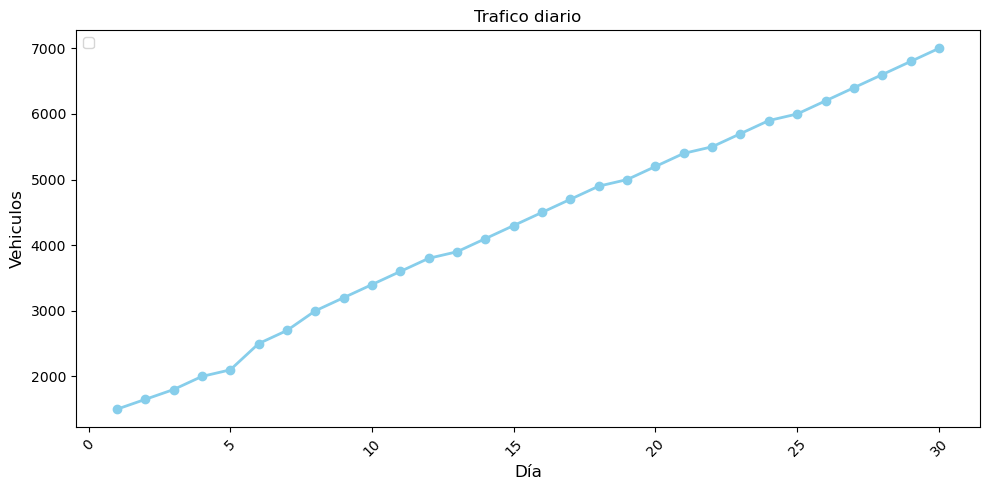

In [30]:
#3. Crear un gráfico de líneas para visualizar el tráfico diario :

plt.figure(figsize=(10,5))
plt.plot(df['Día'], df['Vehículos'], color='skyblue', linestyle='-', linewidth=2, marker='o')
plt.title('Trafico diario')
plt.xlabel('Día', fontsize=12)
plt.ylabel('Vehiculos', fontsize=12)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

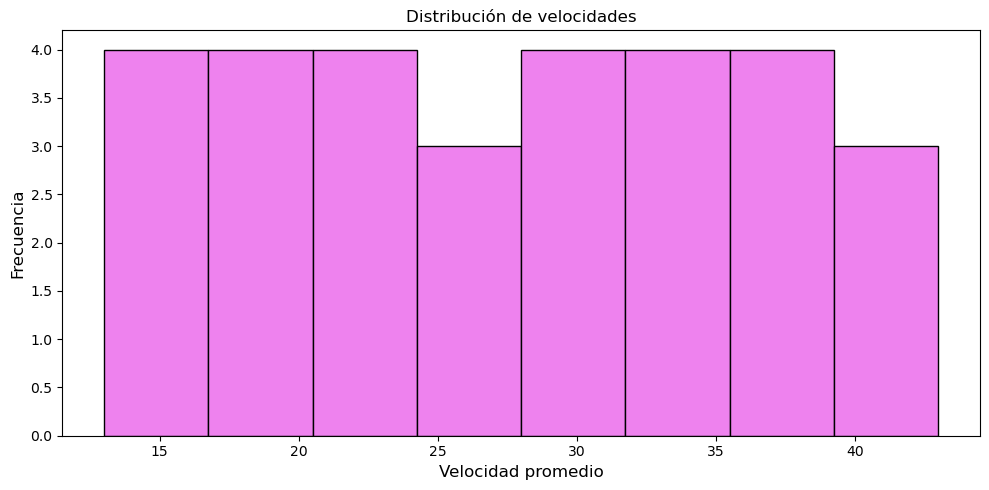

In [31]:
# 4. Crear un histograma para analizar la distribución de velocidades :

plt.figure(figsize=(10,5))
plt.hist(df['Velocidad_Promedio'], bins=8, color='violet', edgecolor='black')
plt.title('Distribución de velocidades')
plt.xlabel('Velocidad promedio', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.tight_layout()
plt.show()

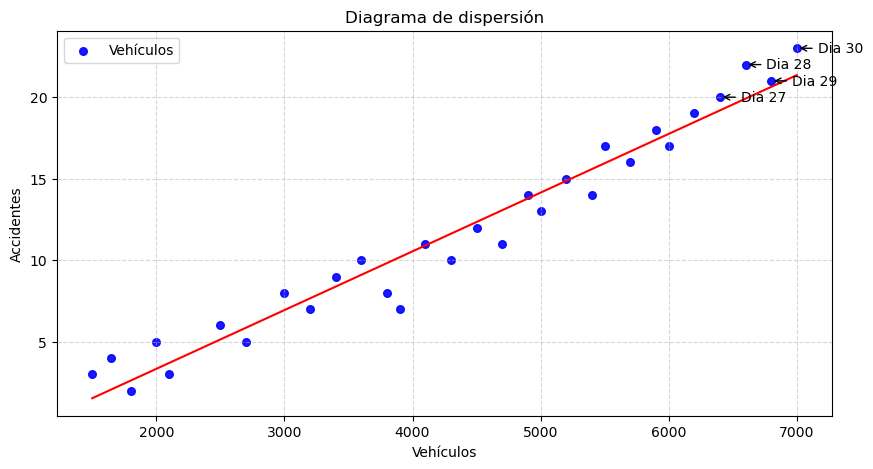

In [32]:
#5. Crear un gráfico de dispersión para analizar la relación entre vehículos y accidentes :

#Regresion lineal
X = df[['Vehículos']].values
Y = df[['Accidentes']].values
modelo = LinearRegression() 
modelo.fit(X, Y)
accidentes_prediccion = modelo.predict(X)

#Gráfico de dispersión
plt.figure(figsize=(10, 5))
plt.scatter(df['Vehículos'], df['Accidentes'], s=30, color="blue", label="Vehículos", alpha=0.9)
plt.plot(X, accidentes_prediccion, color="red", label="Regresión Lineal")
plt.xlabel("Vehículos")
plt.ylabel("Accidentes")
plt.title("Diagrama de dispersión")
plt.legend(['Vehículos'], loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig('dispersion.png', dpi=120)

top_accidentes = df.nlargest(4, 'Accidentes')

for i, row in top_accidentes.iterrows():
    plt.annotate(f'Dia {row['Día']}', (row['Vehículos'], row['Accidentes']), xytext=(15, -3), textcoords='offset points', color='black', arrowprops=dict(arrowstyle='->', color='black', lw=1))

plt.show()
